Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

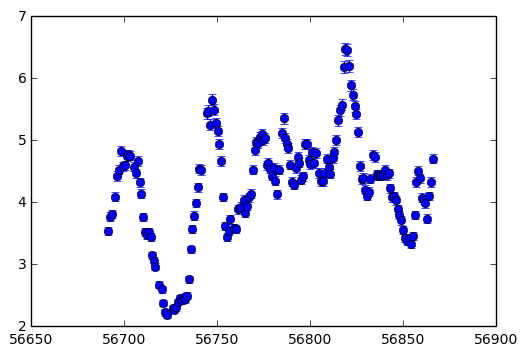

In [1]:
import numpy as np
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

from scipy.stats import norm
from scipy.stats import lognorm

ref_file="lc/1367A.lc"
echo_file="lc/6175A.lc"


dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [3]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqd




array([ 0.00964867,  0.02886003,  0.0556922 ,  0.08632291,  0.13380051,
        0.20739079,  0.32145572,  0.49825637])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.337e-01 6.112e+01 inf -- -4.041e+02 -- 1 1 1 1 1 1 1
   2 7.647e-01 6.015e+01 6.901e+01 -- -3.351e+02 -- 0.65784 0.58285 0.5699 0.567505 0.56704 0.566344 0.573791
   3 3.242e+00 5.939e+01 6.602e+01 -- -2.691e+02 -- 0.42512 0.198095 0.146253 0.137492 0.135449 0.133237 0.150987
   4 1.563e+00 5.894e+01 6.233e+01 -- -2.067e+02 -- 0.328446 -0.100568 -0.261985 -0.286046 -0.293214 -0.298752 -0.270142
   5 6.151e-01 5.858e+01 5.845e+01 -- -1.483e+02 -- 0.300114 -0.231637 -0.637422 -0.692493 -0.715789 -0.728243 -0.692465
   6 3.834e-01 5.758e+01 5.397e+01 -- -9.432e+01 -- 0.288119 -0.218711 -0.948517 -1.05695 -1.12601 -1.152 -1.11841
   7 2.764e-01 5.488e+01 4.687e+01 -- -4.745e+01 -- 0.288807 -0.20359 -1.129 -1.33421 -1.50858 -1.56203 -1.54725
   8 2.123e-01 4.884e+01 3.703e+01 -- -1.042e+01 -- 0.290741 -0.199424 -1.16697 -1.47951 -1.82761 -1.93862 -1.97495
   9 1.660e-01 3.761e+01 2.500e+01 -- 1.458e+01 -- 0.297078 -0.192793 -1.17471 -1.51254 -2.03046 -2.24008 -2.39415
  10 1.251e-01 

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.481e+01 3.004e-01 5.393e-01 0.89 +++
+++ 3.525e+01 3.432e+01 3.004e-01 6.588e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.004e-01 5.990e-01 1.34 +++
+++ 3.525e+01 3.470e+01 3.004e-01 5.692e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.004e-01 5.543e-01 0.996 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.782e-01 2.426e-02 0.974 +++
+++ 3.525e+01 3.422e+01 -1.782e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.782e-01 7.486e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.782e-01 4.956e-02 1.21 +++
+++ 3.525e+01 3.471e+01 -1.782e-01 3.691e-02 1.09 +++
+++ 3.525e+01 3.474e+01 -1.782e-01 3.058e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.782e-01 2.742e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.075e+00 0.275 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.597 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.873e-01 0.798 +++
+++ 3.525e+01 3.480e+01 -1.191e+00 -9.727e-01 0.909 +++
+++ 3.525e+01 3.477e+01 -1.191e+00 -9.655e-01 0.

<Container object of 3 artists>

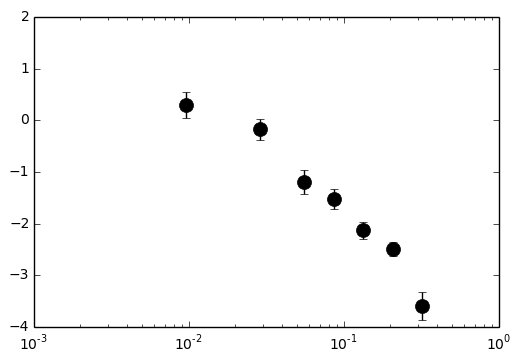

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="black")


<Container object of 3 artists>

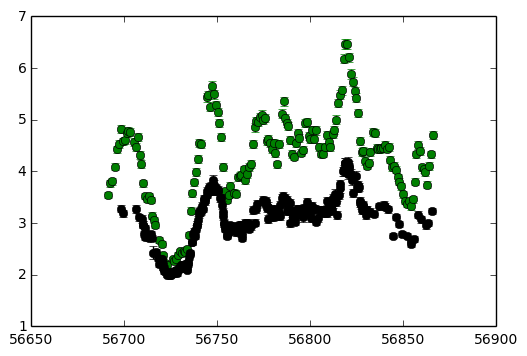

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o', color="green")
errorbar(t2, l2, yerr=l2e, fmt='o', color="black")

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.366e-01 5.289e+01 inf -- -1.581e+02 -- 1 1 1 1 1 1 1
   2 7.741e-01 5.224e+01 6.092e+01 -- -9.716e+01 -- 0.64151 0.582988 0.567078 0.568391 0.566833 0.565789 0.56338
   3 3.418e+00 5.136e+01 5.853e+01 -- -3.863e+01 -- 0.388803 0.191096 0.136557 0.140188 0.135589 0.132301 0.127287
   4 1.555e+00 5.020e+01 5.546e+01 -- 1.684e+01 -- 0.278504 -0.141428 -0.288802 -0.28161 -0.292287 -0.300033 -0.307779
   5 5.853e-01 4.862e+01 5.209e+01 -- 6.893e+01 -- 0.251696 -0.361387 -0.704482 -0.692633 -0.715864 -0.730643 -0.741316
   6 3.638e-01 4.653e+01 4.847e+01 -- 1.174e+02 -- 0.242093 -0.451675 -1.10227 -1.08525 -1.13485 -1.15797 -1.17191
   7 2.636e-01 4.340e+01 4.346e+01 -- 1.609e+02 -- 0.240629 -0.481083 -1.4522 -1.44125 -1.54556 -1.57775 -1.59823
   8 2.061e-01 3.824e+01 3.545e+01 -- 1.963e+02 -- 0.243061 -0.504278 -1.67538 -1.722 -1.93248 -1.97969 -2.01957
   9 1.693e-01 3.015e+01 2.492e+01 -- 2.212e+02 -- 0.246578 -0.524331 -1.72708 -1.87967 -2.25718 -2.33983 -2.4357
  10 1.458e-01 1.

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 2.470e+02 2.466e+02 2.658e-01 5.023e-01 0.854 +++
+++ 2.470e+02 2.461e+02 2.658e-01 6.205e-01 1.8 +++
+++ 2.470e+02 2.463e+02 2.658e-01 5.614e-01 1.29 +++
+++ 2.470e+02 2.465e+02 2.658e-01 5.318e-01 1.06 +++
+++ 2.470e+02 2.465e+02 2.658e-01 5.171e-01 0.956 +++
+++ 2.470e+02 2.465e+02 2.658e-01 5.244e-01 1.01 +++
	### errors for param 1 ###
+++ 2.470e+02 2.465e+02 -5.421e-01 -3.320e-01 0.961 +++
+++ 2.470e+02 2.460e+02 -5.421e-01 -2.269e-01 2.03 +++
+++ 2.470e+02 2.463e+02 -5.421e-01 -2.794e-01 1.45 +++
+++ 2.470e+02 2.464e+02 -5.421e-01 -3.057e-01 1.2 +++
+++ 2.470e+02 2.465e+02 -5.421e-01 -3.188e-01 1.08 +++
+++ 2.470e+02 2.465e+02 -5.421e-01 -3.254e-01 1.02 +++
+++ 2.470e+02 2.465e+02 -5.421e-01 -3.287e-01 0.989 +++
+++ 2.470e+02 2.465e+02 -5.421e-01 -3.270e-01   1 +++
	### errors for param 2 ###
+++ 2.470e+02 2.468e+02 -1.725e+00 -1.597e+00 0.298 +++
+++ 2.470e+02 2.467e+02 -1.725e+00 -1.532e+00 0.648 +++
+++ 2.470e+02 2.466e+02 -1.725e+00 -1.500e+00

<Container object of 3 artists>

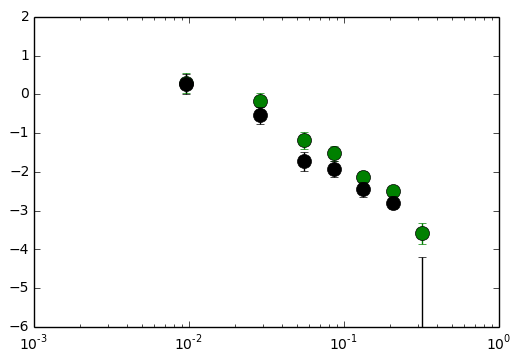

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="green")
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10, color="black")

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 2.269e+03 1.198e+01 inf -- 3.072e+02 -- -0.016924 -0.660135 -1.75788 -2.02078 -2.59034 -2.94206 -6.09489 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 1.973e+01 1.431e+01 2.169e+00 -- 3.094e+02 -- 0.013775 -0.617135 -1.71294 -1.98677 -2.55944 -2.92003 -5.79489 0.0404501 0.0959497 0.114729 0.117623 0.0757218 0.113097 -2.34566
   5 1.376e+02 1.686e+01 2.089e+00 -- 3.115e+02 -- 0.040954 -0.582314 -1.67663 -1.9585 -2.5335 -2.90131 -6.09489 -0.00586333 0.0932507 0.124785 0.131208 0.0569706 0.123911 1.99582
   7 4.464e+02 1.966e+01 1.915e+00 -- 3.134e+02 -- 0.064849 -0.55355 -1.64669 -1.9347 -2.51145 -2.88524 -5.79489 -0.0424971 0.0914217 0.131924 0.142018 0.0422318 0.133023 -0.334542
   9 3.480e+01 2.272e+01 1.812e+00 -- 3.152e+02 -- 0.0858141 -0.529439 -1.62163 -1.91445 -2.49256 -2.87136 -5.49489 -0.0719278 0.0901783 0.137158 0.150801 0.0304433 0.140833 2.03211
  11 1.002e+01 2.607e+01 1.783e+00 -- 3.170e+02 -- 0.104218 -0.509001 -1.60042 -1.89706 -2.47621 -2.85932 -5.19489 -0.0958829 0.089339 0.1

In [1]:
%autoreload
p, pe = clag.errors(Cx, p, pe)

ERROR:root:Line magic function `%autoreload` not found.


NameError: name 'clag' is not defined

In [11]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

NameError: name 'fqd' is not defined

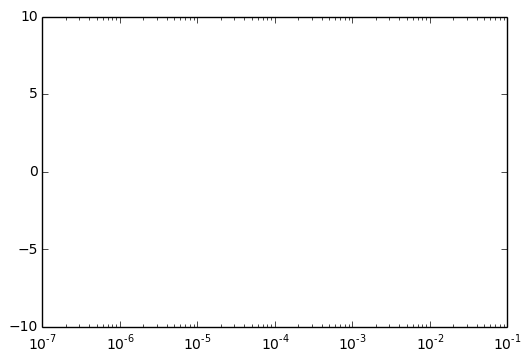

In [2]:


xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")

lag

In [ ]:
mu,sigma = norm.fit(lag,loc=12e-2)
xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")
plot(fqd,norm.pdf(fqd,mu,sigma))
mu,sigma


